## Анализ рынка комьютерных игр

**Цель исследования:** используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры

**Описание проекта:** Выявлены параметры, определяющие успешность игры в разных регионах мира. На
основании этого подготовлен отчет для магазина компьютерных игр для планирования
рекламных кампаний. Проведена предобработка данных, анализ. Выбран актуальный
период для анализа. Составлены портреты пользователей каждого региона. Проверены
гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
средние пользовательские рейтинги жанров Action и Sports разные. При анализе использовали критерий Стьюдента для независимых выборок.

## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Предобработка данных

In [5]:
#Переводим названия столбцов в нижный регистр
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
#Выявляем количество строк с пропущенными значениями
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
#выгрузим все уникальные згачения в названии игр
data['name'].sort_values().unique()

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'wwe Smackdown vs. Raw 2006', '¡Shin Chan Flipa en colores!',
       nan], dtype=object)

In [8]:
#уберем первый лишний пробел в названии игр, лишние кавычки
data['name'] = data['name'].str.strip()
data['name'] = data['name'].replace("'",'',regex=True)
data['name'].sort_values().unique()

array(['.hack//G.U. Vol.1//Rebirth', '.hack//G.U. Vol.2//Reminisce',
       '.hack//G.U. Vol.2//Reminisce (jp sales)', ...,
       'wwe Smackdown vs. Raw 2006', '¡Shin Chan Flipa en colores!', nan],
      dtype=object)

Выявим строки с пропущенными значениями в названии и жанре игр.

In [9]:
data.query('genre.isna()')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Получается, что значения пропущены в одних и тех же строках. Поскольку 2 строки это только 0,01% всего датафрейма, их удаление не окажет существенного влияния на исследование.

In [11]:
#сбрасываем строки с пропущенными названиями
data.dropna(subset=['name'], inplace=True)
data.reset_index(drop=True)
data.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Обрабатываем пропущенные значения в годе релиза.

In [12]:
data.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Не представляется возможным корректно востановить пропущенные значения в столбце 'year_of_release', поскольку на разных платформах релизы игр могут существенно отличаться во времени. Так как 269 строк это только 1,6 % всего датафрейма, их удаление не окажет существенного влияния на исследование.

In [13]:
#сбрасываем строки с пропущенными годами релиза
data.dropna(subset=['year_of_release'], inplace=True)
data.reset_index(drop=True)
data.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [14]:
#Перводим тип данных в столбце 'user_score'в float.
#метод to_numeric также заменяет значение tbd в столбце 'user_score', 'critic_score'на Nan
#tbd - To Be Determined, то есть "Будет определено".
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')


У нас наблюдается большой объем пропущенных значений в столбцах 'critic_score', 'user_score' (почти половина дата фрейма), такой объем данных не представляется возможным корректно заменить. Заменять данные пропуски на 0 не целесообразно, т.к. значения можгут содержать оценку в 0 баллов, оставляем как есть.

In [15]:
data.dtypes 

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [16]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [17]:
data['platform'].sort_values().unique() #выгружаем все уникальные значения названия игоровых платформ

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [18]:
data['genre'].sort_values().unique() #выгружаем все уникальные значения игоровых жанров

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [19]:
data['rating'].sort_values().unique() #выгружаем все уникальные значения рейтинга ESRB

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Расшифровка рейтинга Entertainment Software Rating Board (ESRB):

EC	Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует.

E	Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика.

E 10+	Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей.

T	Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.

M	Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную 
жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков.

AO	Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности.

RP	Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

K-A («Kids to Adults»)— «Для детей и взрослых»: Содержание игры вполне подходит для возрастной категории от 6 лет и старше. Такие игры подходят для всех возрастов. Они могут содержать минимальное насилие или немного грубый разговорный язык.

Заменим все пропущеные значения в этом столбце на "нет данных"

Нет возможности определить, на основании чего возникли данные пропуски. В списках есть пропуски в играх ранних годов (например 1984, 1985, 1989), что может говорить о том, что ранее рейтинг играм не присваивался, поскольку ESRB была основана в 1994 году. Есть пропуски в играх 2016 года, что может говорить о том, что рейтинг еще не определен. Компании не обязаны предоставлять игру на определение рейтинга до начала официальных продаж, так как её содержимое может значительно измениться в ходе разработки. Рейтинг так же отсутсвует у игр 2006, 2005 гг, что может говорить об ошибке заполнения и игнорировании графы при заполнении данных или о том, что рейтинг присваивался другой системой рейтинговой оценки.

In [20]:
data['rating'] = data['rating'].fillna('нет данных')
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'нет данных'],
      dtype=object)

In [21]:
data['critic_score'].sort_values().unique() #выгружаем все уникальные значения рейтинга 'critic_score'

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

Считаем суммарные продажи во всех регионах и записываем их в отдельный столбец.

In [22]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [23]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,нет данных,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,нет данных,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,нет данных,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,нет данных,28.31


In [24]:
data['total_sales'].describe()

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

Пропуски в столбцах "critic_score" и "user_score" - критики и пользователи могли не ценивать данные продукты, либо в данной выгрузке нет этих данных. Поскольку пропусков давольно много (1/3 датафрейма), то пропуски оставляем.

## Исследовательский анализ

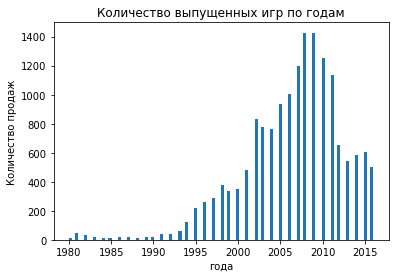

count    16444.00
mean      2006.49
std          5.88
min       1980.00
25%       2003.00
50%       2007.00
75%       2010.00
max       2016.00
Name: year_of_release, dtype: float64

In [25]:
plt.hist(data['year_of_release'], bins=100, range=(1980,2016))
plt.title('Количество выпущенных игр по годам')
plt.xlabel('года')
plt.ylabel('Количество продаж')
plt.show()
data['year_of_release'].describe().round(2)

На графике мы можем наблюдать практически плавный рост релизов видео-игр с небольшими выбросами в 2002, 2003 гг. и резкое падение в 2011 году после пика в 2008, 2009 гг. 

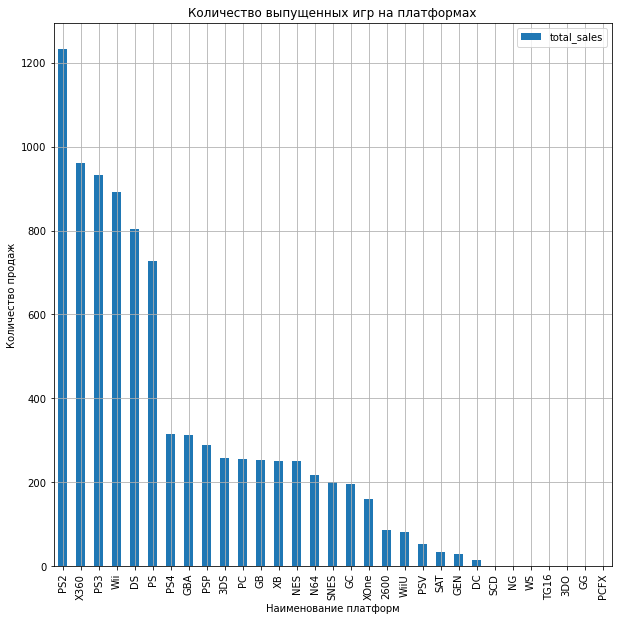

In [26]:
(
    data.groupby('platform').agg({'total_sales': 'sum'})
    .sort_values('total_sales', ascending=False)
    .plot(grid=True, kind='bar', figsize=(10, 10))
)
plt.title('Количество выпущенных игр на платформах')
plt.xlabel('Наименование платформ')
plt.ylabel('Количество продаж')
plt.show()


Можно выделить шесть платформ по продажам игр, сумарные продажи на которых идут с большим отрывом от других платформ. Это PS2, X360, PS3, Wii, DS, PS. Как видно на консолях PlayStation выпускалось больше популярных игр, т.к. целых три консоли данной марки попали в нашу топ-выборку.

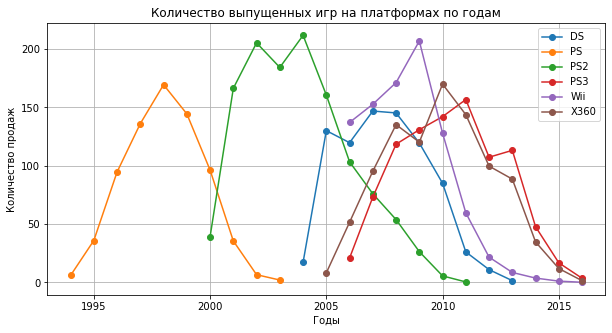

In [27]:

(
    data.query("platform == ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']")
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, style='o-', figsize=(10, 5), label = data['platform'])
)
plt.xlim(1993, 2017)
plt.title('Количество выпущенных игр на платформах по годам')
plt.legend()
plt.xlabel('Годы')
plt.ylabel('Количество продаж')
plt.show()


In [28]:
new_data = data.query("year_of_release >= 2011")

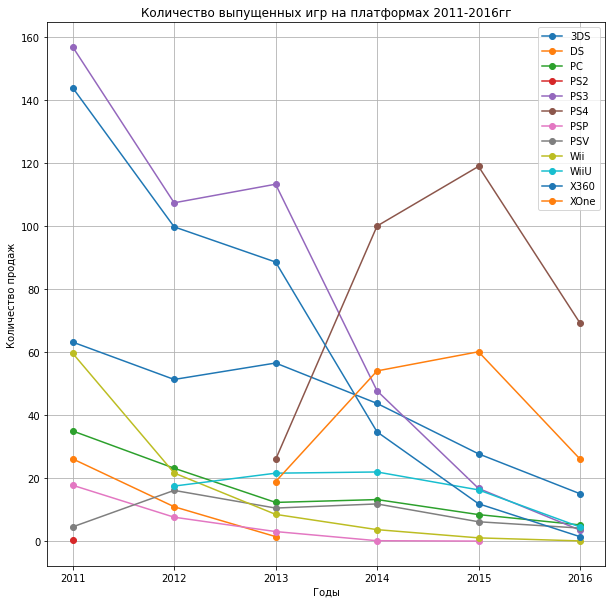

In [29]:
(
    new_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, style='o-', figsize=(10, 10), label = data['platform'])
)
plt.title('Количество выпущенных игр на платформах 2011-2016гг')
plt.legend()
plt.xlabel('Годы')
plt.ylabel('Количество продаж')
plt.show()


В разрезе 2011-2016 прослеживается появление новых платформ в 2013 году.
Также обращаем внимание, что релизы игр на консолях PS4, XOne, 3DS, PC, WiiU находятся на спаде, но еще достаточно активно выпускаются на рынке. У платформ PS4, XOne наблюдается пик выпуска новых игр в 2015 году, на основании ранее полученной информации о сроках актуальности платформ, позволяет нам сделать вывод, что данные консоли будут популярны ориентировочно до 2020 года.
Индустрия игр - диномично развивающаяся сфера бизнеса. Далее для анализа данных будем брать в расчет игры выпущенные в период 2014-2016 гг.

In [30]:
new_data = data.query("year_of_release >= 2014")
new_data.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,нет данных,14.63
1,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,нет данных,11.68
3,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,нет данных,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1684,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,нет данных,0.01
1685,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,нет данных,0.01
1686,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,нет данных,0.01
1687,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,нет данных,0.01


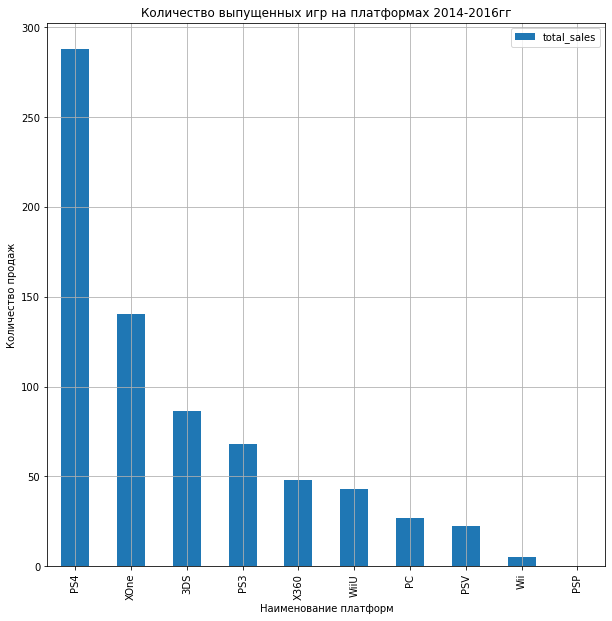

In [31]:
(
    new_data.groupby('platform').agg({'total_sales': 'sum'})
    .sort_values('total_sales', ascending=False)
    .plot(grid=True, kind='bar', figsize=(10, 10))
)
plt.title('Количество выпущенных игр на платформах 2014-2016гг')
plt.xlabel('Наименование платформ')
plt.ylabel('Количество продаж')
plt.show()


Выберем и проанализируем топ-5 платформ по продажам 2013-2016гг. 

In [32]:
data_top_platform = new_data.query("platform == ['PS3', 'X360', 'PS4', 'XOne', '3DS']")

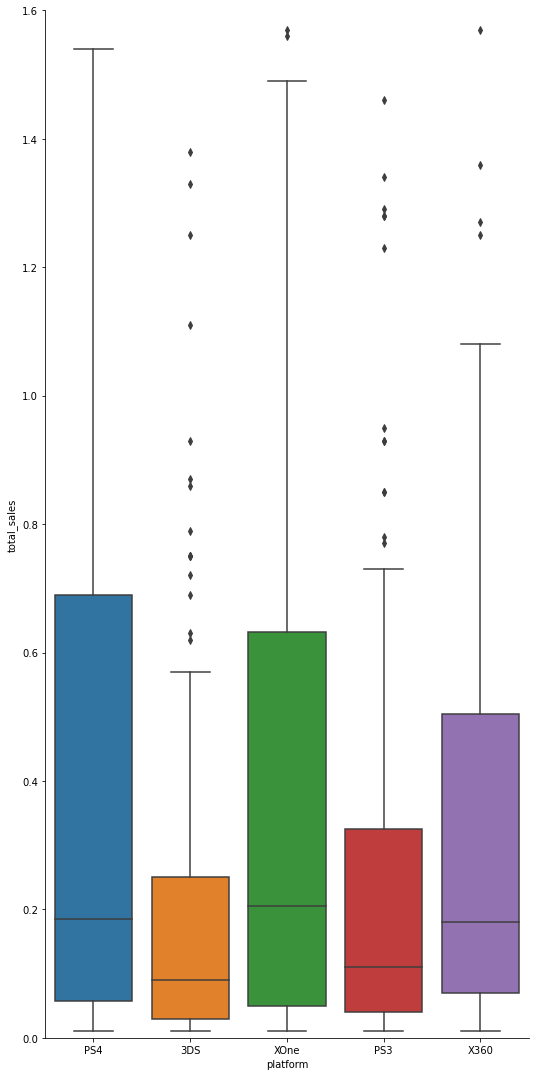

In [33]:
sns.catplot(x='platform',
            y='total_sales',
            height = 15,
            aspect=0.5,
            kind='box',
            data=data_top_platform)
plt.ylim(0, 1.6)
plt.show()

In [34]:
data_top_platform['total_sales'].describe()

count    1146.000000
mean        0.551126
std         1.215718
min         0.010000
25%         0.050000
50%         0.140000
75%         0.480000
max        14.630000
Name: total_sales, dtype: float64

Как видно из графика boxplot есть игры, на выпуске которых разработчики зарабатывают очень мало, так и игры продажы которых приносят огромную прибыль компаниям. Лидерами рынка по максимальным продажам игр стали платформа ХOne и PS4.Большая часть диапазона продаж лежит в среднем по 5 топ-платформам от 0,01 до 0,6. При этом сильно выделяется консоль Nintendo 3DS, на которой меньше всего удалось заработать на играх, возможно это связано с тем, что N3DS является карманной консолью и игры для неё стоят дешевле.

Рассмотрим, как влияют на продажи внутри двух популярных платформ ХOne и PS4 отзывы пользователей и критиков.

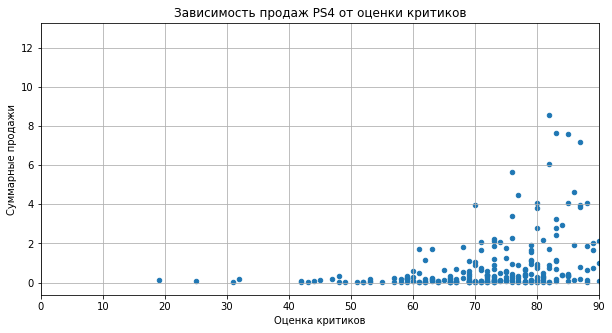

Коэффициент корреляции: 0.4


In [35]:
data_ps4 = data_top_platform.query("platform == 'PS4'")

data_ps4.plot(x='critic_score', y='total_sales', kind='scatter', xlim=(0,90), grid=True, figsize=(10,5))
plt.title('Зависимость продаж PS4 от оценки критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи')
plt.show()
print('Коэффициент корреляции:', data_ps4['critic_score'].corr(data_ps4['total_sales']).round(2))

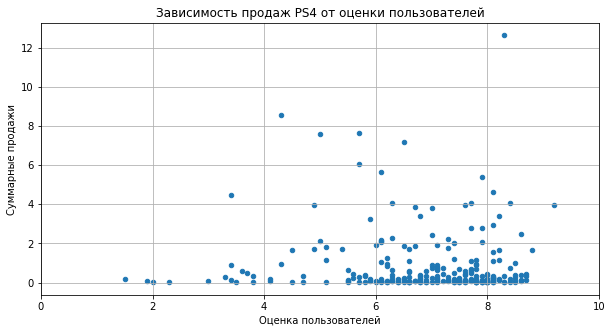

Коэффициент корреляции: -0.04


In [36]:
data_ps4.plot(x='user_score', y='total_sales', kind='scatter', xlim=(0,10), grid=True, figsize=(10,5))
plt.title('Зависимость продаж PS4 от оценки пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи')
plt.show()
print('Коэффициент корреляции:', data_ps4['user_score'].corr(data_ps4['total_sales']).round(2))

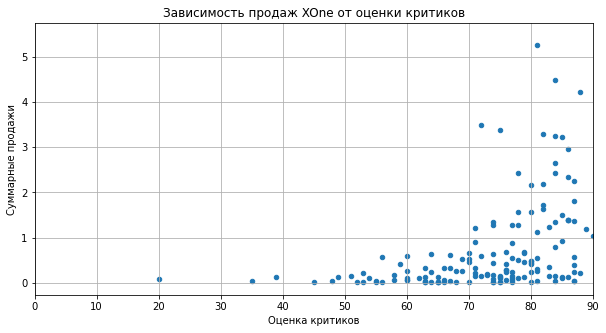

Коэффициент корреляции: 0.43


In [37]:
data_xone = data_top_platform.query("platform == 'XOne'")

data_xone.plot(x='critic_score', y='total_sales', kind='scatter', xlim=(0,90), grid=True, figsize=(10,5))
plt.title('Зависимость продаж XOne от оценки критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи')
plt.show()
print('Коэффициент корреляции:', data_xone['critic_score'].corr(data_xone['total_sales']).round(2))

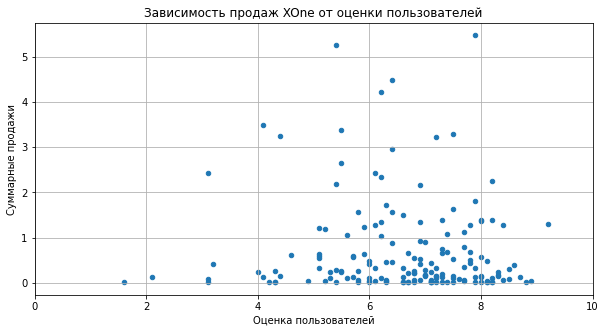

Коэффициент корреляции: -0.07


In [38]:
data_xone.plot(x='user_score', y='total_sales', kind='scatter', xlim=(0,10), grid=True, figsize=(10,5))
plt.title('Зависимость продаж XOne от оценки пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи')
plt.show()
print('Коэффициент корреляции:', data_xone['user_score'].corr(data_xone['total_sales']).round(2))

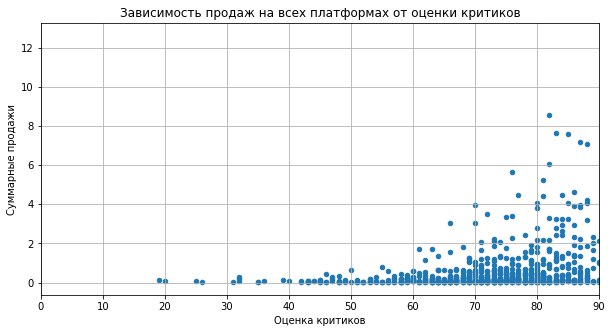

Коэффициент корреляции: 0.33


In [39]:
new_data.plot(x='critic_score', y='total_sales', kind='scatter', xlim=(0,90), grid=True, figsize=(10,5))
plt.title('Зависимость продаж на всех платформах от оценки критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи')
plt.show()
print('Коэффициент корреляции:', new_data['critic_score'].corr(new_data['total_sales']).round(2))

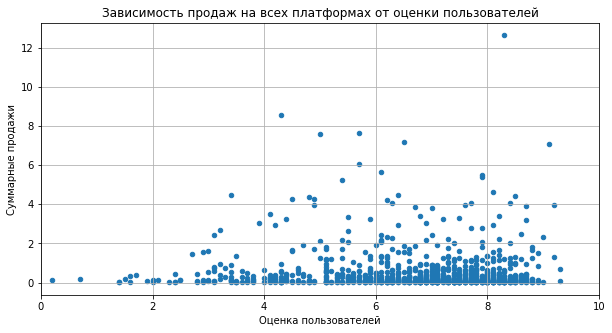

Коэффициент корреляции: -0.01


In [40]:
new_data.plot(x='user_score', y='total_sales', kind='scatter', xlim=(0,10), grid=True, figsize=(10,5))
plt.title('Зависимость продаж на всех платформах от оценки пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи')
plt.show()
print('Коэффициент корреляции:', new_data['user_score'].corr(new_data['total_sales']).round(2))

Заметна не сильная корреляция между продажами и оценкой критиков. При это оценка игры пользователей почти не влияет на продажи. Как правило при старте релиза игры отдаются профессиональным игрокам (китикам) на тесты. Можно сделать вывод о том, что игры с более сильными рекламными компаниями покупаются охотнее игр без них.

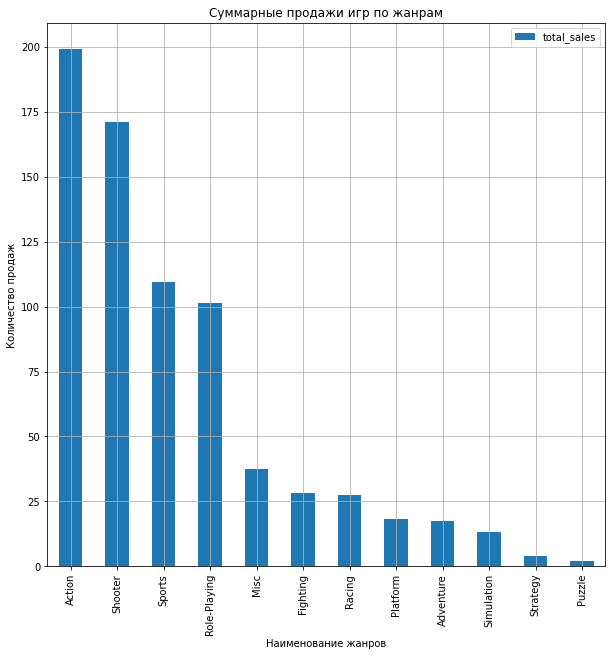

In [41]:
(
    new_data.groupby('genre').agg({'total_sales': 'sum'})
    .sort_values('total_sales', ascending=False)
    .plot(grid=True, kind='bar', figsize=(10, 10))
)
plt.title('Суммарные продажи игр по жанрам')
plt.xlabel('Наименование жанров')
plt.ylabel('Количество продаж')
plt.show()


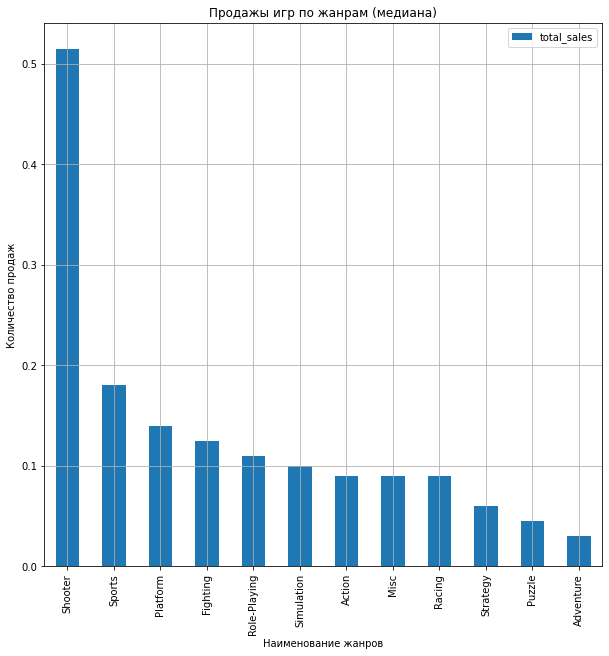

In [42]:
(
    new_data.groupby('genre').agg({'total_sales': 'median'})
    .sort_values('total_sales', ascending=False)
    .plot(grid=True, kind='bar', figsize=(10, 10))
)
plt.title('Продажы игр по жанрам (медиана)')
plt.xlabel('Наименование жанров')
plt.ylabel('Количество продаж')
plt.show()


Топ-5 жанра по продажам: Action, Shooter, Sports, Role-Playing, Misc. Самые низкие продажи у жанров Puzzle, Strategy, Simulation. Жанр Action в среднем в два раза популярнее других жанров. 
При этом следует отметить, что в среднем игры жанров Shooter, Sports и Platform стоят дороже. Причем в среднем стоимость игр жанра Shooter в 4 раа больше других.

Такая разница может говорить, о том, что игры жанра Action продаются в количестве больше других, а соответсвенно более популярны.

**Вывод:**

Пик популярности игр пишелся на 2008-2009 гг. Затем идет резкое в 2011г. снижение популярности игр на платформах. Снижение количества релизов можно связать с  потерей актуальности такого формата игр и переход пользователей на мобильные платформы. 

Характерный средний срок актуальности платформы для игры - около 10 лет. После выхода новой платформы число выпускаемых видеоигр растет примерно в течение 5 лет, а затем плавно снижается.
Прослеживается появление новых платформ в 2013 году. 

Релизы игр на консолях PS4, XOne, 3DS, PC, WiiU находятся на спаде, но еще достаточно активно выпускаются на рынке. У платформ PS4, XOne наблюдается пик выпуска новых игр в 2015 году, на основании ранее полученной информации о сроках актуальности платформ, позволяет нам сделать вывод, что данные консоли будут популярны ориентировочно до 2020 года.

Есть игры, на выпуске которых разработчики зарабатывают очень мало, так и игры продажы которых приносят огромную прибыль компаниям.

Заметна не сильная корреляция между продажами и оценкой критиков. При это оценка игры пользователей почти не влияет на продажи. Можно сделать вывод о том, что наиболее популярные платформы проводят более крупные рекламные компании и соответсвенно имеют больше успехов в продажах игр.

За период 2014-2016 гг. самыми популярными жанрами по продажам стали: Action, Shooter, Sports. Самые низкие продажи у жанров Puzzle, Strategy, Simulation. Жанр Action в среднем в два раза популярнее других жанров. 
Самыми дорогими играми стали игры жанра Shooter, которые в 4 раза дороже других. Такая разница может говорить, о том, что игры жанра Action продаются в количестве больше других, а соответсвенно более популярны.

## Портрет пользователя для каждого региона

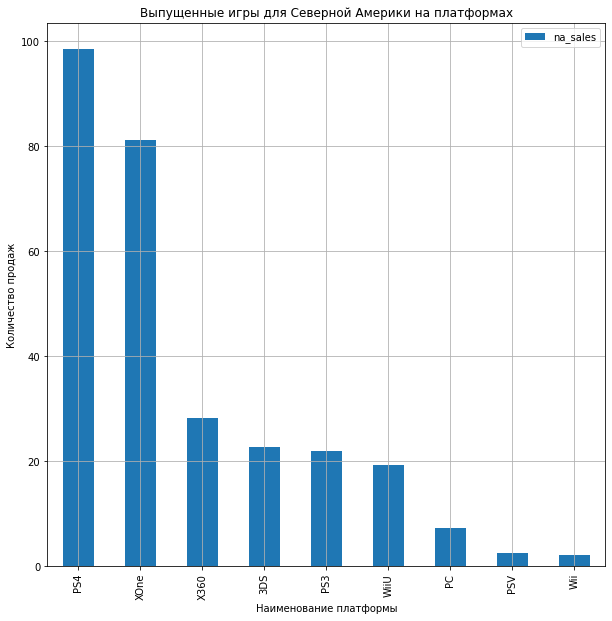

In [43]:
data_na = new_data.query('na_sales >0')
(
    data_na.groupby('platform').agg({'na_sales': 'sum'})
    .sort_values('na_sales', ascending=False)
    .plot(grid=True, kind='bar', figsize=(10, 10))
)
plt.title('Выпущенные игры для Северной Америки на платформах')
plt.xlabel('Наименование платформы')
plt.ylabel('Количество продаж')
plt.show()

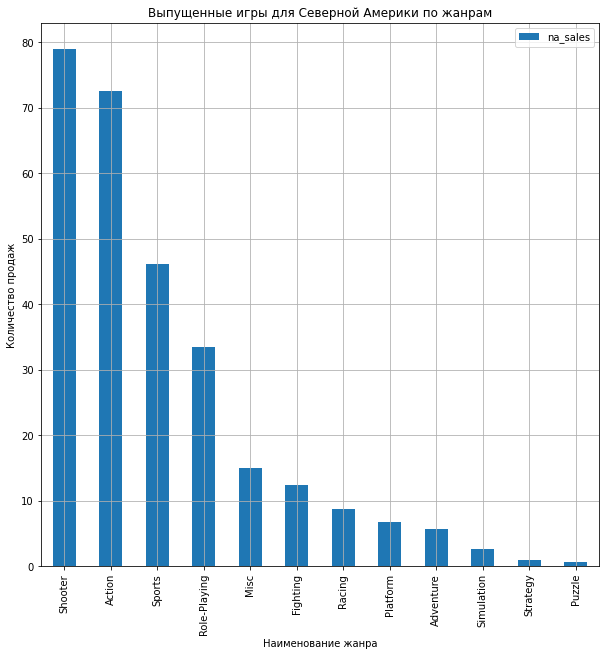

In [44]:

(
    data_na.groupby('genre').agg({'na_sales': 'sum'})
    .sort_values('na_sales', ascending=False)
    .plot(grid=True, kind='bar', figsize=(10, 10))
)
plt.title('Выпущенные игры для Северной Америки по жанрам')
plt.xlabel('Наименование жанра')
plt.ylabel('Количество продаж')
plt.show()

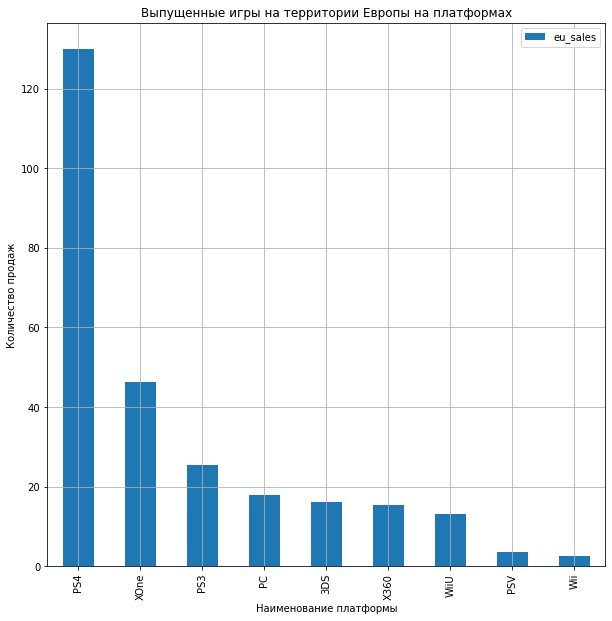

In [45]:
data_eu = new_data.query('eu_sales >0')
(
    data_eu.groupby('platform').agg({'eu_sales': 'sum'})
    .sort_values('eu_sales', ascending=False)
    .plot(grid=True, kind='bar', figsize=(10, 10))
)
plt.title('Выпущенные игры на территории Европы на платформах')
plt.xlabel('Наименование платформы')
plt.ylabel('Количество продаж')
plt.show()

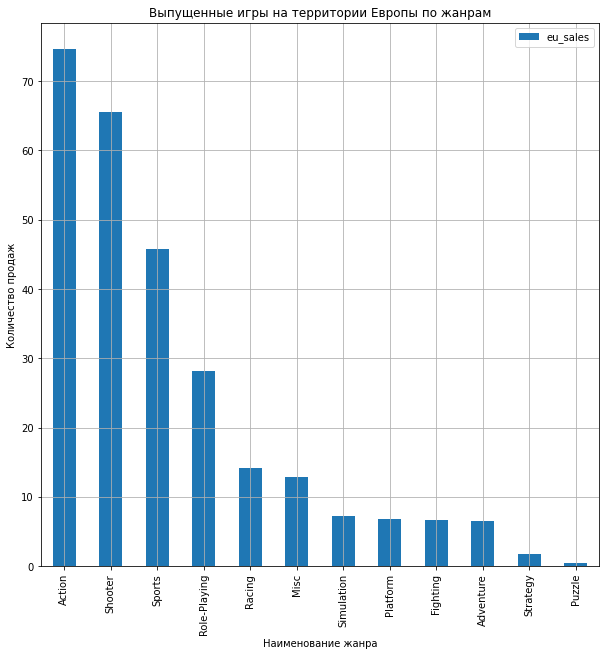

In [46]:

(
    data_eu.groupby('genre').agg({'eu_sales': 'sum'})
    .sort_values('eu_sales', ascending=False)
    .plot(grid=True, kind='bar', figsize=(10, 10))
)
plt.title('Выпущенные игры на территории Европы по жанрам')
plt.xlabel('Наименование жанра')
plt.ylabel('Количество продаж')
plt.show()

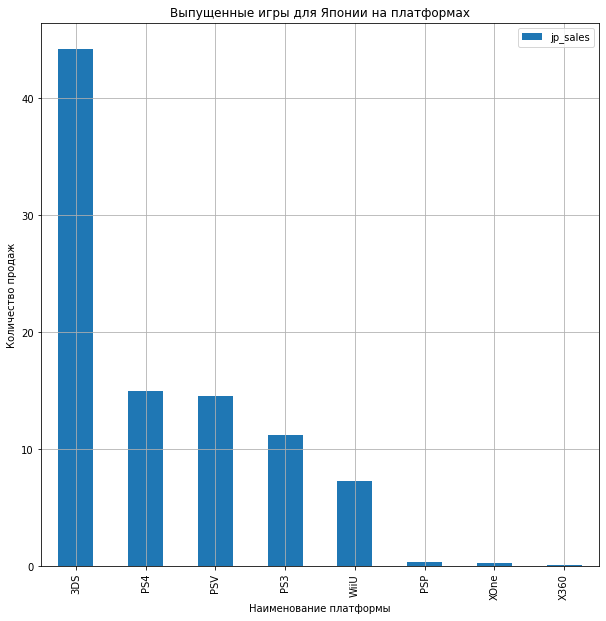

In [47]:
data_jp = new_data.query('jp_sales >0')
(
    data_jp.groupby('platform').agg({'jp_sales': 'sum'})
    .sort_values('jp_sales', ascending=False)
    .plot(grid=True, kind='bar', figsize=(10, 10))
)
plt.title('Выпущенные игры для Японии на платформах')
plt.xlabel('Наименование платформы')
plt.ylabel('Количество продаж')
plt.show()

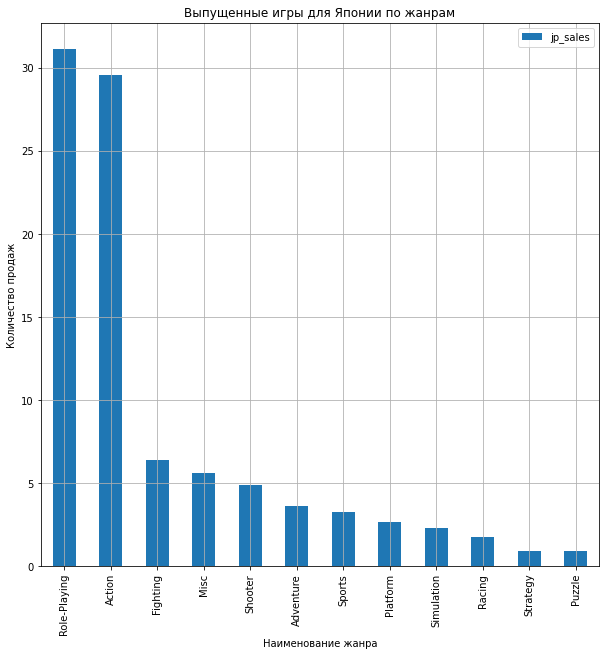

In [48]:
(
    data_jp.groupby('genre').agg({'jp_sales': 'sum'})
    .sort_values('jp_sales', ascending=False)
    .plot(grid=True, kind='bar', figsize=(10, 10))
)
plt.title('Выпущенные игры для Японии по жанрам')
plt.xlabel('Наименование жанра')
plt.ylabel('Количество продаж')
plt.show()

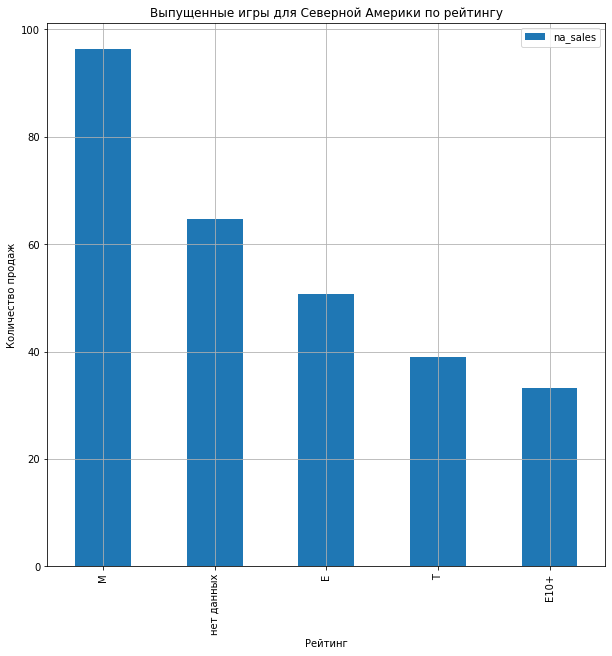

In [49]:
(
    data_na.groupby('rating').agg({'na_sales': 'sum'})
    .sort_values('na_sales', ascending=False)
    .plot(grid=True, kind='bar', figsize=(10, 10))
)
plt.title('Выпущенные игры для Северной Америки по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж')
plt.show()

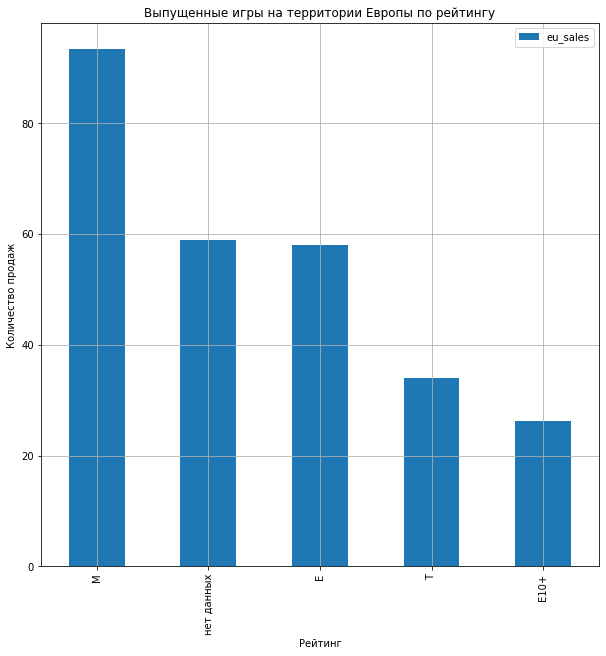

In [50]:
(
    data_eu.groupby('rating').agg({'eu_sales': 'sum'})
    .sort_values('eu_sales', ascending=False)
    .plot(grid=True, kind='bar', figsize=(10, 10))
)
plt.title('Выпущенные игры на территории Европы по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж')
plt.show()

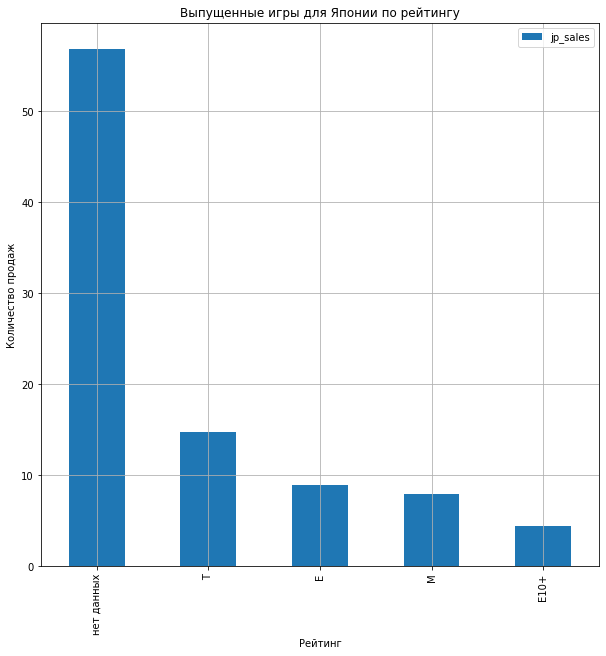

In [51]:
(
    data_jp.groupby('rating').agg({'jp_sales': 'sum'})
    .sort_values('jp_sales', ascending=False)
    .plot(grid=True, kind='bar', figsize=(10, 10))
)
plt.title('Выпущенные игры для Японии по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж')
plt.show()

**Вывод:**

В каждом из регионов предпочтительные платформы отличаются. Так для Северной Америки самые популярные платформы PS4, XOne, X360.  Для Европы: PS4, XOne, PS3, для Японии 3DS, PS3, PSV. Таким образом в Северной Америкие наибольшую популярность имеют консоли XBox, американского производителя Майкрософт, несмотря на то, что они занимают 2 и 3 место, суммарно по продажам они опережают японский PS4.  Европейские пользователи предпочитают японские PlayStation. В Японии - предпочтение отдают местным производителям Nintendo и PlayStation, при этом самую высокую популярность (1 место) имеют карманные консоли Nintendo.

В Северной Америке наибольшую популярность имеют игры жанра Shooter, Action, Sports. В Европе: Action, Shooter, Sports. В Японии Role-Playing, Action, Fighting.

Следует отметить, что в рейтиге большой объем пропущенных данных, что искажает интерпретацию результата исследования. 
Нет возможности определить, на основании чего возникли данные пропуски. Данные пропуски могут говорить о том, что рейтинг еще не определен, либо об ошибке заполнения и игнорировании графы при заполнении данных или о том, что рейтинг присваивался другой системой рейтинговой оценки.


## Проверка гипотез

In [52]:
new_data.isna().sum() #проверяем количество пропусков, которые могут помешать вычеслениям

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       971
user_score         801
rating               0
total_sales          0
dtype: int64

In [53]:
new_data.shape[0] #всего строк в исследуемом дата фрейме

1689

In [54]:
new_data.dropna(subset=['user_score'], inplace=True)  #сбрасываем строки с пропущенными значениями в столбце 'user_score'
data.reset_index(drop=True)
data.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,нет данных,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,нет данных,31.38


**Проверка гипотезы:** средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

**H_0:** Cредние пользовательские рейтинги (user_score) платформы Xbox One ('XOne') = средние пользовательские рейтинги (user_score) платформы PC ('PC').

**H_a:** Cредние пользовательские рейтинги (user_score) платформы Xbox One ('XOne') ≠ средние пользовательские рейтинги (user_score) платформы PC ('PC'). 

Зададим уровень значимости alpha = 0.05.


In [55]:
df_x1 = new_data[new_data['platform'] =='XOne']
df_x1 = df_x1['user_score']

df_pc = new_data[new_data['platform'] =='PC']
df_pc = df_pc['user_score']

results = st.ttest_ind(df_x1, df_pc, equal_var=False)
alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Результаты t-теста говорят о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а результаты теста являются статистически значимыми (p < 0.05).
Соответсвенно мы не можем отвергнуть гипотезу о том, что средние пользовательские рейтинги (user_score) платформы Xbox One ('XOne') = средние пользовательские рейтинги (user_score) платформы PC ('PC')
Мы использовали дополнительный параметр equal_var = False, потому что мы можем ожидать, что выборки Xbox One и PC различны размеру, поскольку суммарные продажи на данных платформах различны (Xbox One является лидером по продажам, а PC не входит в топ-5 платформ по суммарным продажам.)

**Проверка гипотезы:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 

Поскольку в качестве нулевой гипотезы принято принимать равенство двух выборок. То наша нулевая гипотеза и альтернативная будут звучать так:

**H_0:** Cредние пользовательские рейтинги (user_score) жанров Action = средние пользовательские рейтинги (user_score) жанров Sports.

**H_a:** Cредние пользовательские рейтинги (user_score) жанров Action ≠ средние пользовательские рейтинги (user_score) жанров Sports.

Зададим уровень значимости alpha = 0.05.

In [56]:
df_action = new_data[new_data['genre'] =='Action']
df_action = df_action['user_score']

df_sports = new_data[new_data['genre'] =='Sports']
df_sports = df_sports['user_score']

results = st.ttest_ind(df_action, df_sports, equal_var=False)# results = вызов метода для проверки гипотезы
alpha = 0.05 #задайте значение уровня значимости

print(results.pvalue) # вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод:** Результаты t-теста говорят о том, что средние пользовательские рейтинги платформ Xbox One и PC различны, а результаты теста являются статистически значимыми (p < 0.05).
Соответсвенно, мы подтверждаем гипотезу, о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Мы использовали дополнительный параметр equal_var = False, потому что мы можем ожидать, что выборки Xbox One и PC различны размеру, поскольку суммарные продажи на данных платформах различны (Xbox One является лидером по продажам, а PC не входит в топ-5 платформ по суммарным продажам.)

## Общий вывод

Пик популярности игр пришелся на 2008-2009 гг. Затем идет резкое в 2011г. снижение популярности игр на платформах. Снижение количества релизов можно связать с  потерей актуальности такого формата игр и переход пользователей на мобильные платформы. 

Характерный средний срок актуальности платформы для игры - около 10 лет. После выхода новой платформы число выпускаемых видеоигр растет примерно в течение 5 лет, а затем плавно снижается.
Прослеживается появление новых платформ в 2013 году. 

Релизы игр на консолях PS4, XOne, 3DS, PC, WiiU находятся на спаде, но еще достаточно активно выпускаются на рынке. У платформ PS4, XOne наблюдается пик выпуска новых игр в 2015 году, на основании ранее полученной информации о сроках актуальности платформ, позволяет нам сделать вывод, что данные консоли будут популярны ориентировочно до 2020 года.

Есть игры, на выпуске которых разработчики зарабатывают очень мало, так и игры продажы которых приносят огромную прибыль компаниям.

Заметна не сильная корреляция между продажами и оценкой критиков. При это оценка игры пользователей почти не влияет на продажи. Можно сделать вывод о том, что наиболее популярные платформы проводят более крупные рекламные компании и соответсвенно имеют больше успехов в продажах игр.

За период 2014-2016 гг. самыми популярными жанрами по продажам стали: Action, Shooter, Sports. Самые низкие продажи у жанров Puzzle, Strategy, Simulation. Самыми дорогими играми стали игры жанра Shooter, которые в 4 раза дороже других. Такая разница может говорить, о том, что игры жанра Action продаются в количестве больше других, а соответсвенно более популярны.

В каждом из регионов предпочтительные платформы и жанры игр отличаются. Так в Северной Америке наибольшую популярность имеют консоли XBox, американского производителя Майкрософт, несмотря на то, что они занимают 2 и 3 место, суммарно по продажам они опережают японский PS4.  Европейские пользователи предпочитают японские PlayStation (1 и 2 место). В Японии - предпочтение отдают местным производителям Nintendo и PlayStation, при этом самую высокую популярность (1 место) имеют карманные консоли Nintendo 3DS.
В Северной Америке наибольшую популярность имеют игры жанра Shooter, Action, Sports. В Европе: Action, Shooter, Sports. В Японии Role-Playing, Action, Fighting.

По результат проведенных Т-тестов мы выяснили, нельзя отрицать, что средние пользовательские рейтинги платформы Xbox One и средние пользовательские рейтинги платформы PC одинаковые. А так же подтвердили ранее выдвинутую гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 

Резумируя вышеуказанные данные, в настоящий момент целесообразно сделать упор на продажу игр для рынка Северной Америки и Европы в жанре Action (как самого продаваемого) и жанре Shooter (как самых дорогих) на платформах PlayStation 4 и XBox One.
Для рынка Японии: для пользователей карманной консоли Nintendo 3DS в жанре Role-Playing и Action.